<p style="font-size:300%; background-color:gray; color:white; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Tarea 3. Espacios de Color</p>
<p style="font-size:240%; background-color:gray; color:white; text-align:center;line-height : 60px; margin : 0; padding : 0;">
Visión de Máquina</p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> <br>Jefferson Javier Hernández Panqueba</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email: jejhernandezpa@unal.edu.co</p>
<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> 
<br>Jaime Andrés Castillo León</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email:jacastillol@unal.edu.co</p>
<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>28 de Febrero de 2018</p>

<h1 style="font-size:200%; background-color:gray; color:white; text-align:center; line-height : 60px;">
Contenido </h1>

<ol style="font-size:120%; line-height : 35px;">
<li>
    <h4>Estudiar los diferentes espacios de color que tiene OpenCV, utilizando imágenes de su proyecto.</h4>
</li>
<li>
    <h4>Implementar, como una función para OpenCV, las conversiones entre los espacios de color siguientes:</h4>
    <ul>
        <li>RGB a LUX y su inversa</li>
        <li>RGB a OHTA y su inversa</li>
    </ul>
    Evaluarlas en su proyecto o en aplicaciones a detección de rostros y de segmentación de productos, respectivamente.
</li>
</ol>


<h1 style="font-size:100%; background-color:rgba(150, 150, 150, 1.0); color:white; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; J.J. Hernández & J.A. Castillo </h1>

In [1]:
%matplotlib inline
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt

<h2>Los diferentes espacios de color que tiene OpenCV</h2>
<ol>
<ul>
<li> OpenCV tiene la funcion 
```
cv2.cvtColor(img, cv2.COLOR_RBG...)
```, para convertir entre modelos de color
</li>
<li> Los modelos de control estudiados en esta documento son: RGB, GRAY, HSV, HLS, LUV, XYZ, YCrCb, LAB, YUV </li>
<li> Todos los modelos son comparados de la siguiente conversion RGB $<=>$ MODELO DE COLOR </li>
</ul>
</ol>

<h1 style="font-size:100%; background-color:rgba(150, 150, 150, 1.0); color:white; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; J.J. Hernández & J.A. Castillo </h1>

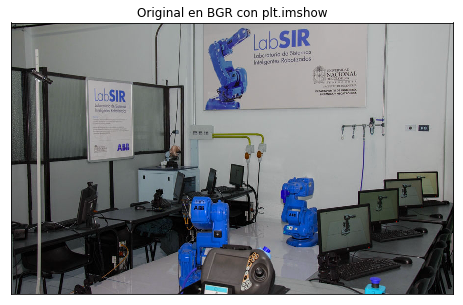

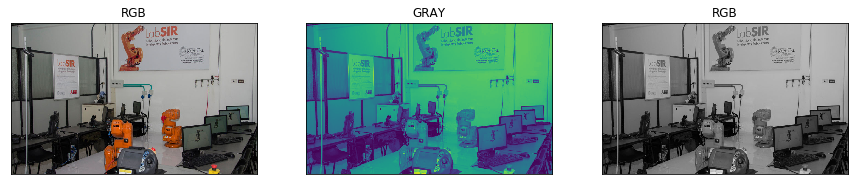

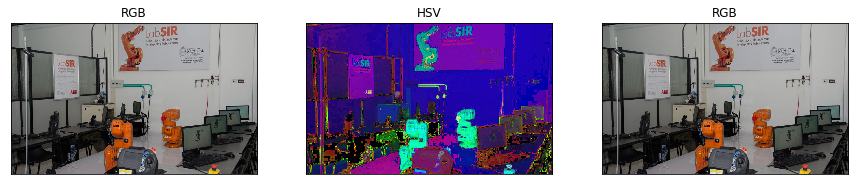

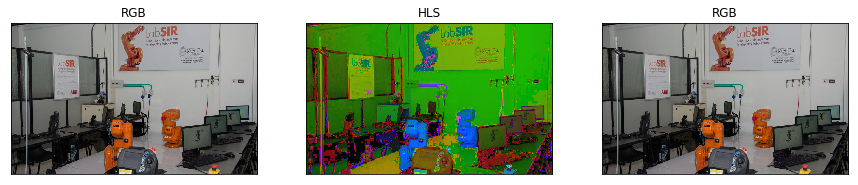

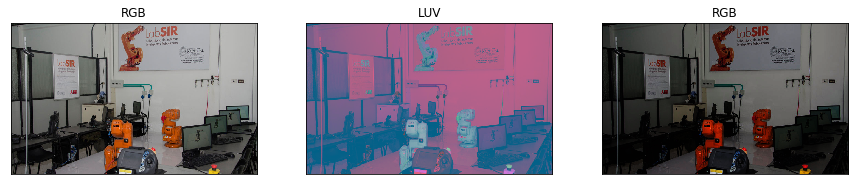

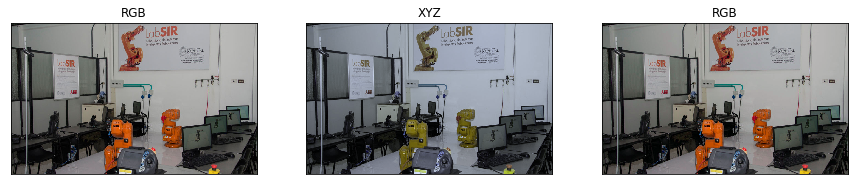

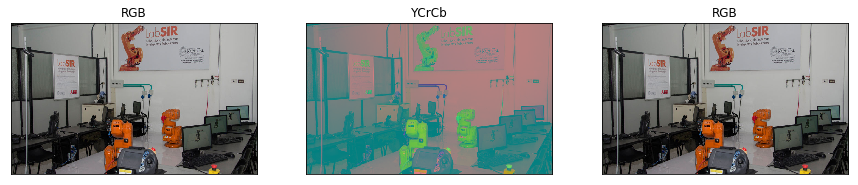

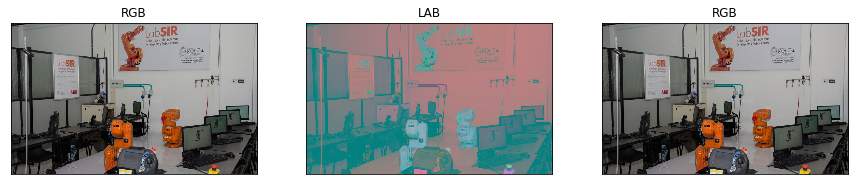

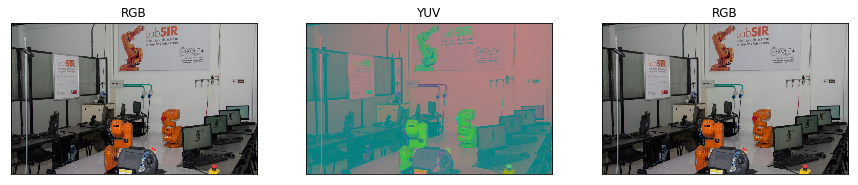

In [7]:
images = ['../tarea01/ABBpicking.jpg',
          '../tarea01/labSIR.jpg',
          '../tarea01/BIOLOIDpostures.jpg',
          '../tarea01/NAOpostures.jpg']

imgo = cv2.imread(images[1],cv2.IMREAD_COLOR)
imgo2rgb = cv2.cvtColor(imgo, cv2.COLOR_BGR2RGB)

def printColorConvertion(fig,model_str,img,c,c_1):
    img2 = cv2.cvtColor(img, c)
    img3 = cv2.cvtColor(img2, c_1)
    plt.figure(fig,figsize=(15,5))
    plt.subplot(131),plt.imshow(img)
    plt.title('RGB'), plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(img2)
    plt.title(model_str), plt.xticks([]), plt.yticks([])
    plt.subplot(133),plt.imshow(img3)
    plt.title('RGB'), plt.xticks([]), plt.yticks([])
    plt.show()
    return

plt.figure(1,figsize=(15,5))
plt.imshow(imgo)
plt.title('Original en BGR con plt.imshow'), plt.xticks([]), plt.yticks([])
plt.show()
printColorConvertion(2,'GRAY',imgo2rgb,cv2.COLOR_RGB2GRAY,cv2.COLOR_GRAY2RGB)
printColorConvertion(3,'HSV',imgo2rgb,cv2.COLOR_RGB2HSV, cv2.COLOR_HSV2RGB)
printColorConvertion(4,'HLS',imgo2rgb,cv2.COLOR_RGB2HLS, cv2.COLOR_HLS2RGB)
printColorConvertion(5,'LUV',imgo2rgb,cv2.COLOR_RGB2LUV, cv2.COLOR_LUV2LRGB)
printColorConvertion(6,'XYZ',imgo2rgb,cv2.COLOR_RGB2XYZ, cv2.COLOR_XYZ2RGB)
printColorConvertion(7,'YCrCb',imgo2rgb,cv2.COLOR_RGB2YCrCb, cv2.COLOR_YCrCb2RGB)
printColorConvertion(8,'LAB',imgo2rgb,cv2.COLOR_RGB2LAB, cv2.COLOR_LAB2RGB)
printColorConvertion(9,'YUV',imgo2rgb,cv2.COLOR_RGB2YUV, cv2.COLOR_YUV2RGB)


<h2>RGB a LUX y viceversa</h2>
<ul style="font-size:140%; line-height : 25px;">
  <li>El nombre LUX viene del acrónimo Logarithmic hUe eXtension, dado que es un espacio de color no lineal que está basado en una finción logaritmica. Este algoritmo tiene buen desempeño en la dectección de piel.</li>
  <li>La conversión entre RGB y LUX se realiza de la siguiente manera: </li>
</ul>

<p style="font-size:140%; text-align:center; line-height : 25px; margin-top : 0; "> $L=(R+1)^{0.3}(G+1)^{0.6}(B+1)^{0.6}-1 $</p>
<p style="font-size:140%; text-align:center; line-height : 25px; margin-top : 0; "> $U = \left \{ \begin{matrix} \frac{M}{2}(\frac{R+1}{L+1}) & \mbox{si }R<L \\  M-\frac{M}{2}(\frac{L+1}{R+1}) & \mbox{cualquier otro caso}\end{matrix}\right.$ </p>
<p style="font-size:140%; text-align:center; line-height : 25px; margin-top : 0; "> $X = \left \{ \begin{matrix} \frac{M}{2}(\frac{B+1}{L+1}) & \mbox{si }B<L \\  M-\frac{M}{2}(\frac{L+1}{B+1}) & \mbox{cualquier otro caso}\end{matrix}\right.$ </p>

<ul style="font-size:140%; line-height : 25px;">
  <li>donde $M$ es el rango dinámico de los niveles de gris, para una codificación de 8 bits M = 256.</li>
</ul>

<ul style="font-size:140%; line-height : 25px;">
  <li>Devido a la alta no linealidad su versión inversa no es sencilla</li>
</ul>

<h1 style="font-size:100%; background-color:rgba(150, 150, 150, 1.0); color:white; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; J.J. Hernández & J.A. Castillo </h1>